In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import VisualDataMaker
import CNNRegressionAndSoftmax as CRS
import tensorflow as tf
import keras
from keras import Input, Model

In [2]:
data, OHE_LABELS = VisualDataMaker.combine("./random_BG_IMG/n_data/*.jpg", "./original_DOB_images/*.png")
bounded_DOB = VisualDataMaker.plot_bounding_box(data)

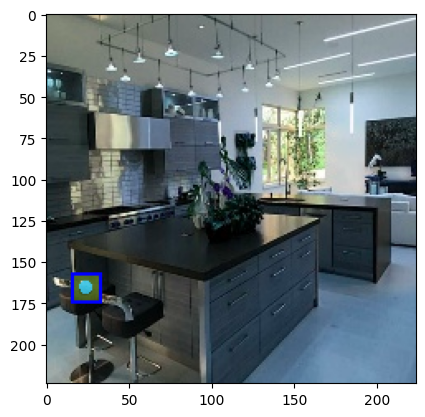

In [3]:
plt.imshow(bounded_DOB[158][0])
plt.show()

In [4]:
batch = []
regr_truth = []
class_truth = []
for i in range(len(data)):
    batch.append(data[i][0])
    regr_truth.append([data[i][2][0], data[i][2][1]])
    class_truth.append(OHE_LABELS[data[i][1]])
    

In [5]:
batch = np.array(batch)
regr_truth = np.array(regr_truth)
class_truth = np.array(class_truth)

In [6]:
batch.shape, regr_truth.shape, class_truth.shape

((2300, 224, 224, 3), (2300, 2), (2300, 10))

In [7]:
batch = tf.keras.backend.constant(batch)

In [8]:
model = CRS.getUntrainedModel()

In [10]:
model.fit(batch, [class_truth, regr_truth], epochs=100, batch_size=32)

72/72 [==============================] - 78s 1s/step - loss: 672.9708 - class_loss: 2.3077 - boundary_box_loss: 670.6630 - class_accuracy: 0.1696 - boundary_box_mse: 670.6630


In [15]:
model.save("./Saved_Models/CNN_Regression_and_Softmax")

INFO:tensorflow:Assets written to: ./Saved_Models/assets


INFO:tensorflow:Assets written to: ./Saved_Models/assets
